In [1]:
import networkx as nx
import random

### Network 1

In [2]:
G = nx.read_edgelist("Network 1.txt", create_using=nx.DiGraph)

#### 1. calculate  the  in-degree  sequence  and  out-degree sequence  of  them

In [3]:
#in-degree
l = list(dict(G.in_degree()).values())
sorted(l)

[0, 0, 1, 1, 2, 2, 2, 2, 4]

In [4]:
#out-degree
l = list(dict(G.out_degree()).values())
sorted(l)

[0, 0, 1, 1, 1, 2, 2, 3, 4]

#### 2. check  their  connectivity,  i.e.  strongly  or  weakly connected

In [5]:
nx.is_strongly_connected(G)

False

In [6]:
nx.is_weakly_connected(G)

True

#### 3. calculate  the  distance  between  node  a and  node  i

In [7]:
try:
    n = nx.shortest_path_length(G, source="a", target="i")
    print(n)
except nx.NetworkXNoPath:
    print('No path')

No path


#### 4. list one subgraph containing at least 5 nodes for each network

In [8]:
def nodes_connected(G, u, v):
    n1 = u in G.neighbors(v)
    n2 = v in G.neighbors(u)
    if n1 or n2:
        return True
    else:
        return False
    
def add_node(G, l, all_nodes):
    random.shuffle(all_nodes)
    for i in range(len(all_nodes)):
        for j in range(len(l)):
            if nodes_connected(G, l[j], all_nodes[i]):
                return all_nodes[i]
            
def subgraph(G):
    l = []
    all_nodes = list(G.nodes)
    l.append(random.sample(list(G.nodes), 1)[0])
    for i in range(random.randint(4,len(list(G.nodes))-2)):
        all_nodes = [element for element in all_nodes if element not in l]
        new_node = add_node(G, l, all_nodes)
        l.append(new_node)
    return l

In [9]:
def draw(G, l):
    remove_node = [e for e in G.nodes if e not in l]
    for i in range(len(remove_node)):
        G.remove_node(remove_node[i])
    return nx.draw(G, with_labels = True)

In [10]:
l = subgraph(G)
print("Subgraph nodes: %s" %l)

Subgraph nodes: ['b', 'c', 'a', 'e', 'i', 'g', 'h']


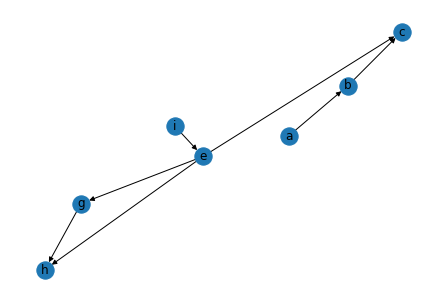

In [11]:
draw(G, l)

### Network 2

In [12]:
G2 = nx.read_edgelist("Network 2.txt", create_using=nx.DiGraph)

#### 1. calculate the in-degree sequence and out-degree sequence of them

In [13]:
#in-degree
l = list(dict(G2.in_degree()).values())
sorted(l)

[0, 1, 1, 1, 2, 2, 2, 3, 3, 5]

In [14]:
#out-degree
l = list(dict(G2.out_degree()).values())
sorted(l)

[0, 1, 1, 1, 1, 2, 2, 3, 4, 5]

#### 2. check their connectivity, i.e. strongly or weakly connected

In [15]:
nx.is_strongly_connected(G2)

False

In [16]:
nx.is_weakly_connected(G2)

True

#### 3. calculate the distance between node a and node i

In [17]:
try:
    n = nx.shortest_path_length(G2, source="a", target="i")
    print(n)
except nx.NetworkXNoPath:
    print('No path')

3


#### 4. list  one  subgraph  containing  at  least  5  nodes  for  each network

In [18]:
l2 = subgraph(G2)
print("Subgraph nodes: %s" %l2)

Subgraph nodes: ['d', 'e', 'f', 'h', 'g', 'c']


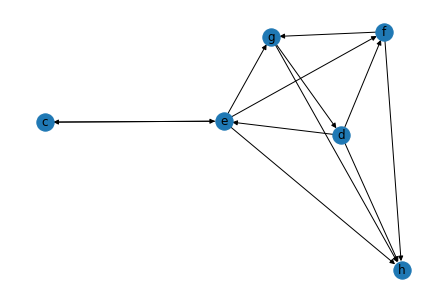

In [19]:
draw(G2, l2)